Importing Library

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import seaborn as sns

Connecting to Google Drive

In [1]:
#  from google drive 
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


Reading CSV File from Drive and printing DataFrame

In [ ]:
#Read the dataset
df = pd.read_csv('./drive/MyDrive/FishFarm/realfishdataset.csv')


#Data
df

,ph,temperature,turbidity,fish
0,6.00,27.00,4.00,katla
1,7.60,28.00,5.90,sing
2,7.80,27.00,5.50,sing
3,6.50,31.00,5.50,katla
4,8.20,27.00,8.50,prawn
...,...,...,...,...
586,7.07,21.12,3.57,sing
587,6.99,21.19,3.56,sing
588,6.87,21.00,3.56,sing
589,6.68,21.19,3.58,sing


dumping Labels to use in deployment in flutter 

In [ ]:
labels = pd.read_csv('./drive/MyDrive/FishFarm/realfishdataset.csv', usecols = ['fish'])
labels.to_csv('./drive/MyDrive/FishFarm/labels.csv')

Different Stats of the DataFrame

In [ ]:
df.describe()

,ph,temperature,turbidity
count,591.000000,591.000000,591.000000
mean,7.532115,21.789306,4.432944
std,0.810588,4.536612,2.169062
min,5.500000,4.000000,1.000000
25%,6.990000,17.940000,3.480000
50%,7.500000,21.060000,3.570000
75%,8.200000,24.000000,4.005000
max,9.000000,35.000000,15.800000


Using Seaborn as SNS to make Pariplot of the Df

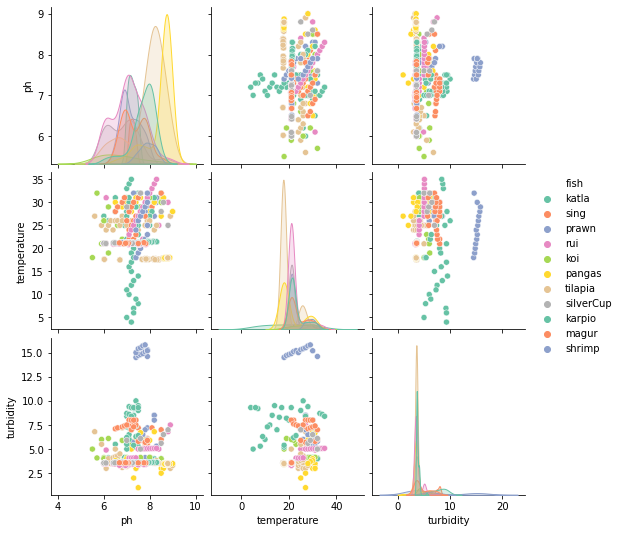

In [ ]:
sns.pairplot(data=df, hue='fish', palette='Set2')

Separating the X and Y-axix from the DataFrame

In [ ]:
X = df.iloc[:,0:3].values
y = df.iloc[:,3].values

Shape of the X and Y-axix of Dataframe

In [ ]:
print(X[0:5])
print(y[0:5])

print(X.shape)
print(y.shape)

[[ 6.  27.   4. ]
 [ 7.6 28.   5.9]
 [ 7.8 27.   5.5]
 [ 6.5 31.   5.5]
 [ 8.2 27.   8.5]]
['katla' 'sing' 'sing' 'katla' 'prawn']
(591, 3)
(591,)


Using SkLearn to encode labels to the Integer, so that the Model could run and varify the labels.

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
print(y1)

[ 1  9  9  1  5  1  1  1  1  6  6  6  6  6  6  2  2  2  2  2  5  5  5  5
  5  9  9  9  9  9  9  4  4  4  4 10 10 10 10 10  4  4  4 10  5  8  4  4
  5  5  5  5  5  2  2  2  2  2  4  4  4  4  1  1  1  1  1  1  1  1  5  5
  2  2  2  2  2 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
  4  4  4  4  4  4  4  4  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3  3  3  3  3  3
  3  3  3  3  3  6  6  6  6  6  6  6  6  6  6  6  6  6  9  9  9  9  9  9
  9  9  9  7  7  7  7  7  7  7  7  7  7  7  7  7  7  8  8  8  8  8  8 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10  4
  4  4  4  4  4  4  4  4  4  4  4  4  4 10 10  6  6  6  6  6  6  6  6  6
  6  6  6  6  6  6  6  6  6  6  6  1  1  1  1  1  1  1  1  1  1  1  7  7
  7  7  7  7  7  7  7  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9
  9  9  9 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10  4  4  4  4  4  4  4  4  4  4  4  4  4  4

In [ ]:
Y = pd.get_dummies(y1).values
print(Y[0:5])

[[0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]


Using the X and Y, Splitting into the Text and Train dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_train[0:5])

[[ 8.16 17.62  3.55]
 [ 7.5  20.87  3.37]
 [ 7.26 21.25  3.62]
 [ 8.79 18.    3.46]
 [ 6.02 17.62  3.57]]


In [ ]:
print(y_train[0:5])

[[0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]]


In [ ]:
print(X_test[0:5])


[[ 8.87 18.    3.46]
 [ 6.1  31.    4.9 ]
 [ 7.   25.    3.2 ]
 [ 8.63 17.94  3.46]
 [ 7.3   6.    9.3 ]]


In [ ]:
print(y_test[0:5])


[[0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0]]


Sequentializing the Model using the Keras.

using the dense layer and 11 as the labels and softmax activation.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(11, activation='softmax')
  ])



compiling the model. 

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



training the model of batch_size 591 and using epochs = 2000 fro better trainig

In [ ]:
model.fit(X_train, y_train, batch_size=591, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 851ms/step - loss: 7.4647 - accuracy: 0.2182
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 7.0668 - accuracy: 0.2182
Epoch 3/2000
1/1 [==============================] - 0s 7ms/step - loss: 6.8051 - accuracy: 0.2182
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 6.6019 - accuracy: 0.2182
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 6.4325 - accuracy: 0.2182
Epoch 6/2000
1/1 [==============================] - 0s 7ms/step - loss: 6.2849 - accuracy: 0.2182
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 6.1522 - accuracy: 0.2182
Epoch 8/2000
1/1 [==============================] - 0s 7ms/step - loss: 6.0303 - accuracy: 0.2182
Epoch 9/2000
1/1 [==============================] - 0s 14ms/step - loss: 5.9166 - accuracy: 0.2182
Epoch 10/2000
1/1 [==============================] - 0s 8ms/step - loss: 5.8095 - accuracy: 0.2182
Epoch 11/2000
1/

In [ ]:

model.save("../drive/MyDrive/FishFarm/fish_model.model")

INFO:tensorflow:Assets written to: ../drive/MyDrive/FishFarm/fish_model.model/assets


In [ ]:
keras_file = "../drive/MyDrive/FishFarm/My_saved_Model.h5"
keras.models.save_model(model , keras_file)

In [ ]:
import os
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
!pwd
!ls

2.8.2
/content
drive  sample_data


In [ ]:
My_TFlite_Model = tf.keras.models.load_model('../drive/MyDrive/FishFarm/My_saved_Model.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open('../drive/MyDrive/FishFarm/My_TFlite_Model.tflite', "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpkomwx3kg/assets


2908

calculating the loss and accuracy of training 

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.486121654510498
Test accuracy: 0.4285714328289032


predicting the test dataset using the trained model

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[2.59548286e-03, 1.58311508e-03, 1.46942658e-09, ...,
        2.67908007e-09, 8.79069262e-07, 4.78265524e-01],
       [6.63932506e-03, 3.68242823e-02, 4.02961284e-01, ...,
        3.17736948e-03, 4.56319132e-04, 9.60481390e-02],
       [4.52396380e-05, 1.66148394e-01, 5.56791760e-02, ...,
        7.50619471e-02, 8.24377686e-03, 1.55207023e-01],
       ...,
       [6.97242445e-04, 6.02199696e-02, 3.45474072e-02, ...,
        2.27066785e-01, 1.15603313e-01, 1.13103606e-01],
       [5.56000927e-03, 3.16065131e-03, 3.65813086e-08, ...,
        1.08169679e-07, 1.95666307e-05, 6.91799998e-01],
       [3.57605256e-02, 6.17720373e-02, 1.59785762e-01, ...,
        8.43677893e-02, 9.68539864e-02, 1.71407446e-01]], dtype=float32)

printing and comparing the test and predicted data. 

In [ ]:
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)
print(f"Actual: {actual}")
print(f"Predicted: {predicted}")

Actual: [ 4  6 10  4  0 10  8  6  0 10 10  9  1  7  5  6  9  7  7  4  7  4  5  8
 10  4 10 10 10  8  9  4  6 10  6  6  8  4  6  0  1  7 10  6  1  4  6  9
  7  9  7  7  5 10 10  6 10 10  8 10  6  1  9  8  9 10  4  6  6  4 10  6
 10  7  4  2 10  6  6  6  4  2  6  6  6  1  8  6  9  8 10  9  1  6  9  2
 10  1  1  4 10  7  8  8 10  1  6  7  0  1  1  8  2  3 10 10  6 10  8]
Predicted: [ 4  2  6 10  0 10  9  6  0 10 10  6  6  6  5  6  9  7  6 10  6 10  3 10
 10  6 10 10  6  6  1 10  6 10  6  6  6 10  4  7  6  6  0  6  1  6  1  1
  0  9  6  6  9 10 10  1 10 10  5  6  9  1  9  6  6  6  1  6  6 10 10  6
 10  6 10  3 10  6  1  6 10  4  6  1  6  6  6  6  6  6 10  6  1  6  3  4
  6  6  6 10 10  6  6  6 10  1  6  6  9  1  6  6  3  3 10 10  6 10  5]


Dumping Model Using Pickel

In [ ]:
model.save("../drive/MyDrive/FishFarm/model.h5")

In [ ]:
import pickle
bow_path = './drive/MyDrive/FishFarm/model.pkl'
pickle.dump(model, open(bow_path, "wb"))

INFO:tensorflow:Assets written to: ram://1e95e7b0-d24e-4630-8d6f-87dbb5f547b1/assets


INFO:tensorflow:Assets written to: ram://1e95e7b0-d24e-4630-8d6f-87dbb5f547b1/assets


loading the dumped model

In [ ]:
model_pred='./drive/MyDrive/FishFarm/model.pkl'
cv = pickle.load(open(model_pred, "rb"))

predicting using the dumped model

In [ ]:
y_pred = cv.predict(X_test)
y_pred

array([[2.59548286e-03, 1.58311508e-03, 1.46942658e-09, ...,
        2.67908007e-09, 8.79069262e-07, 4.78265524e-01],
       [6.63932506e-03, 3.68242823e-02, 4.02961284e-01, ...,
        3.17736948e-03, 4.56319132e-04, 9.60481390e-02],
       [4.52396380e-05, 1.66148394e-01, 5.56791760e-02, ...,
        7.50619471e-02, 8.24377686e-03, 1.55207023e-01],
       ...,
       [6.97242445e-04, 6.02199696e-02, 3.45474072e-02, ...,
        2.27066785e-01, 1.15603313e-01, 1.13103606e-01],
       [5.56000927e-03, 3.16065131e-03, 3.65813086e-08, ...,
        1.08169679e-07, 1.95666307e-05, 6.91799998e-01],
       [3.57605256e-02, 6.17720373e-02, 1.59785762e-01, ...,
        8.43677893e-02, 9.68539864e-02, 1.71407446e-01]], dtype=float32)

comparing the test and predicted data using the dumped model.

In [ ]:
actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)
print(f"Actual: {actual}")
print(f"Predicted: {predicted}")

Actual: [ 4  6 10  4  0 10  8  6  0 10 10  9  1  7  5  6  9  7  7  4  7  4  5  8
 10  4 10 10 10  8  9  4  6 10  6  6  8  4  6  0  1  7 10  6  1  4  6  9
  7  9  7  7  5 10 10  6 10 10  8 10  6  1  9  8  9 10  4  6  6  4 10  6
 10  7  4  2 10  6  6  6  4  2  6  6  6  1  8  6  9  8 10  9  1  6  9  2
 10  1  1  4 10  7  8  8 10  1  6  7  0  1  1  8  2  3 10 10  6 10  8]
Predicted: [ 4  2  6 10  0 10  9  6  0 10 10  6  6  6  5  6  9  7  6 10  6 10  3 10
 10  6 10 10  6  6  1 10  6 10  6  6  6 10  4  7  6  6  0  6  1  6  1  1
  0  9  6  6  9 10 10  1 10 10  5  6  9  1  9  6  6  6  1  6  6 10 10  6
 10  6 10  3 10  6  1  6 10  4  6  1  6  6  6  6  6  6 10  6  1  6  3  4
  6  6  6 10 10  6  6  6 10  1  6  6  9  1  6  6  3  3 10 10  6 10  5]
